<a href="https://colab.research.google.com/github/OdysseusPolymetis/philo_num_grenoble_24/blob/main/spacy_for_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install spacy-transformers

In [ ]:
!pip install grecy

In [ ]:
#!pip install https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl
!python -m grecy install grc_proiel_trf

In [ ]:
import spacy
nlp = spacy.load('grc_proiel_trf')

In [ ]:
!git clone https://github.com/PerseusDL/treebank_data.git

In [ ]:
greek_dir = '/content/treebank_data/v2.1/Greek/texts'
latin_dir = '/content/treebank_data/v2.1/Latin/texts'

In [ ]:
import os
import xml.etree.ElementTree as ET

In [ ]:
def parse_treebank_file(file_path):

    tree = ET.parse(file_path)
    root = tree.getroot()

    indexed_gold_sentences = []
    file_id1 = os.path.basename(file_path)
    print(file_id1)
    print(len(root.findall('.//sentence')))

    for i, sentence in enumerate(root.findall('.//sentence')):
        words = []
        for word in sentence.findall('.//word'):
            words.append({
                'form': word.get('form'),
                'lemma': word.get('lemma'),
                'postag': word.get('postag'),
                'relation': word.get('relation'),
                'head': word.get('head')
            })
        indexed_gold_sentences.append((file_id1,i, words))
    return indexed_gold_sentences

In [ ]:
def process_gold_directory(directory, filter_text):
    all_sentences = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)

                for sentence in sentences:
                    all_sentences.append(sentence)

                print(f"Processed {file_path}")

    return all_sentences

In [ ]:
treebank_sentences=process_gold_directory(greek_dir, 'tlg0012')

tlg0012.tlg001.perseus-grc1.tb.xml
8415
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml
tlg0012.tlg002.perseus-grc1.tb.xml
6723
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml


In [ ]:
def parse_treebank_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    file_id2 = os.path.basename(file_path)

    sentences = []
    for i, sentence in enumerate(root.findall('.//sentence')):
        words = [word.get('form') for word in sentence.findall('.//word')]
        sentence_text = ' '.join(words)
        sentences.append((file_id2, i, sentence_text))
    return sentences

In [ ]:
print(treebank_sentences[:1])

[('tlg0012.tlg001.perseus-grc1.tb.xml', 0, [{'form': 'μῆνιν', 'lemma': 'μῆνις', 'postag': 'n-s---fa-', 'relation': 'OBJ', 'head': '2'}, {'form': 'ἄειδε', 'lemma': 'ἀείδω', 'postag': 'v2spma---', 'relation': 'PRED_CO', 'head': '32'}, {'form': 'θεὰ', 'lemma': 'θεά', 'postag': 'n-s---fv-', 'relation': 'ExD', 'head': '2'}, {'form': 'Πηληϊάδεω', 'lemma': 'Πηληιάδης', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '5'}, {'form': 'Ἀχιλῆος', 'lemma': 'Ἀχιλλεύς', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '1'}, {'form': 'οὐλομένην', 'lemma': 'οὐλόμενος', 'postag': 'a-s---fa-', 'relation': 'ATR', 'head': '1'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '23'}, {'form': 'ἣ', 'lemma': 'ὅς', 'postag': 'p-s---fn-', 'relation': 'SBJ', 'head': '23'}, {'form': 'μυρί̓', 'lemma': 'μυρίος', 'postag': 'a-p---na-', 'relation': 'ATR', 'head': '11'}, {'form': 'Ἀχαιοῖς', 'lemma': 'Ἀχαιός', 'postag': 'a-p---md-', 'relation': 'OBJ', 'head': '12'}, {'form': 'ἄλγἐ', 'l

In [ ]:
def analyze_with_spacy(sentences):
    analyzed_sentences = []
    for file_id, index, sentence in sentences:
        doc = nlp(sentence)
        analyzed_sentences.append((file_id, index, doc))
    return analyzed_sentences

In [ ]:
def process_directory(directory, filter_text, nb_of_sentences):
    all_sentences = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)
                all_sentences.extend(sentences)
                print(f"Processed {file_path}")

    all_sentences = all_sentences[:nb_of_sentences]

    analyzed_sentences = analyze_with_spacy(all_sentences)
    return analyzed_sentences

In [ ]:
nb_of_sentences = 100

In [ ]:
spacy_sentences = process_directory(greek_dir, 'tlg0012', nb_of_sentences)

Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml


In [ ]:
def compare_results(treebank_sentences, spacy_sentences):
    for (file_id_tb, index_tb, sentence_tb), (file_id_spacy, index_spacy, sentence_spacy) in zip(treebank_sentences, spacy_sentences):
        if file_id_tb == file_id_spacy and index_tb == index_spacy:
            print("treebank:", sentence_tb)
            print("spacy data:")
            for token in sentence_spacy:
                print(f"    Text: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}, Tag: {token.tag_}, Dep: {token.dep_}, Head Text: {token.head.text}")

In [ ]:
compare_results(treebank_sentences, spacy_sentences)

n NOUN / PROPN
<br>v VERB
<br>t VERB
<br>a ADJ
<br>d ADV
<br>l DET
<br>g PART
<br>c CCONJ
<br>r ADP
<br>p PRON
<br>m NUM
<br>i INTJ
<br>e EXCL
<br>u PUNCT

In [ ]:
def compare_annotations(tb_sentence, spacy_tuple):
    error_details = {
        'lemma_errors': [],
        'pos_errors': []
    }

    pos_conversion = {
        'n': 'NOUN'
        'n': 'PROPN'
        'v': 'VERB',
        't': 'VERB',
        'a': 'ADJ',
        'd': 'ADV',
        'l': 'DET',
        'g': 'PART',
        'c': 'CCONJ',
        'r': 'ADP',
        'p': 'PRON',
        'm': 'NUM',
        'i': 'INTJ',
        'e': 'EXCL',
        'u': 'PUNCT'
    }

    file_id2, index, spacy_doc = spacy_tuple

    for tb_word, spacy_token in zip(tb_sentence[2], spacy_doc):
        if tb_word['lemma'] != spacy_token.lemma_:
            error_details['lemma_errors'].append({
                'word': tb_word['form'],
                'tb_lemma': tb_word['lemma'],
                'spacy_lemma': spacy_token.lemma_
            })

        if tb_word['postag'] and tb_word['postag'][0] == 'n':
            if spacy_token.pos_ not in ['NOUN', 'PROPN']:
                error_details['pos_errors'].append({
                    'word': tb_word['form'],
                    'tb_pos': tb_word['postag'],
                    'spacy_pos': spacy_token.pos_
                })
        else:
            converted_tb_pos = pos_conversion.get(tb_word['postag'][0], 'UNKNOWN') if tb_word['postag'] else 'None'
            if converted_tb_pos != spacy_token.pos_:
                error_details['pos_errors'].append({
                    'word': tb_word['form'],
                    'tb_pos': tb_word['postag'],
                    'spacy_pos': spacy_token.pos_
                })

    return error_details

In [ ]:
all_errors = {
    'lemma_errors': [],
    'pos_errors': []
}

for tb_sentence, spacy_tuple in zip(treebank_sentences, spacy_sentences):
    errors = compare_annotations(tb_sentence, spacy_tuple)
    all_errors['lemma_errors'].extend(errors['lemma_errors'])
    all_errors['pos_errors'].extend(errors['pos_errors'])

print("Lemma Errors:", all_errors['lemma_errors'])
print("POS Errors:", all_errors['pos_errors'])

Lemma Errors: [{'word': 'Πηληϊάδεω', 'tb_lemma': 'Πηληιάδης', 'spacy_lemma': 'Πηλείδης'}, {'word': 'ἣ', 'tb_lemma': 'ὅς', 'spacy_lemma': 'ὁ'}, {'word': 'μυρί̓', 'tb_lemma': 'μυρίος', 'spacy_lemma': 'μυρία'}, {'word': 'ἄλγἐ', 'tb_lemma': 'ἄλγος', 'spacy_lemma': 'ἄλγεα'}, {'word': 'δ̓', 'tb_lemma': 'δέ', 'spacy_lemma': 'δ̓'}, {'word': 'Ἄϊδι', 'tb_lemma': '', 'spacy_lemma': 'ᾍδης'}, {'word': 'προΐαψεν', 'tb_lemma': 'προιάπτω', 'spacy_lemma': 'προϊάπτω'}, {'word': 'ἑλώρια', 'tb_lemma': 'ἑλώριον', 'spacy_lemma': 'ἕλωρ'}, {'word': 'δ̓', 'tb_lemma': 'δέ', 'spacy_lemma': 'δ̓'}, {'word': 'διαστήτην', 'tb_lemma': 'διίστημι', 'spacy_lemma': 'διΐστημι'}, {'word': 'τ̓', 'tb_lemma': 'τε', 'spacy_lemma': 'τ̓'}, {'word': '[0]', 'tb_lemma': None, 'spacy_lemma': '['}, {'word': 'τ̓', 'tb_lemma': 'τε', 'spacy_lemma': 'τ̓'}, {'word': 'ἀπερείσἰ', 'tb_lemma': 'ἀπερείσιος', 'spacy_lemma': 'ἀπερείσια'}, {'word': 'στέμματ̓', 'tb_lemma': 'στέμμα', 'spacy_lemma': 'στέμματα'}, {'word': 'μάλιστα', 'tb_lemma': 'μά

In [ ]:
from collections import Counter

filtered_pos_errors = [error for error in all_errors['pos_errors']
                       if error['tb_pos'] is not None and
                          error['tb_pos'][0] not in ['g', 'd', 'b']]

pos_error_counts = Counter([error['tb_pos'][0] for error in filtered_pos_errors])

print(pos_error_counts)

Counter({'c': 42, 'p': 32, 'a': 28, 'v': 25, 'n': 15, 'r': 10, '-': 4, 'x': 1, 'l': 1})


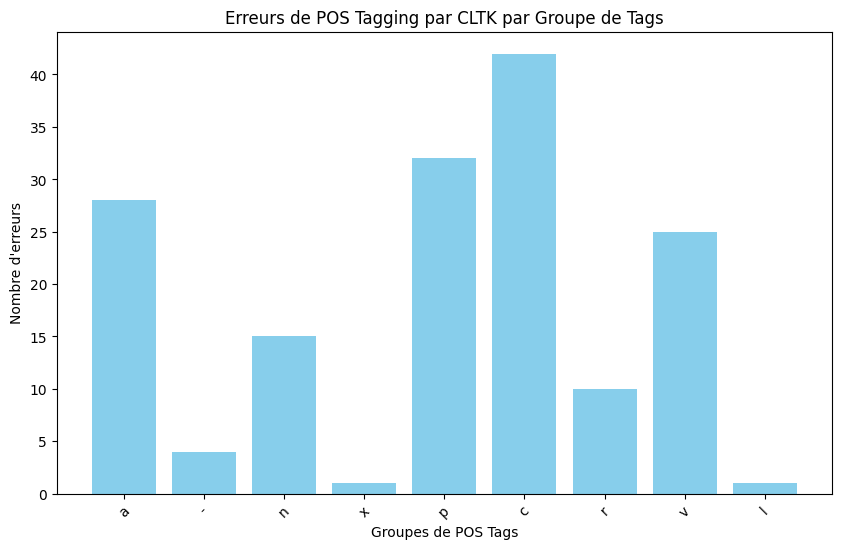

In [ ]:
import matplotlib.pyplot as plt

pos_groups = list(pos_error_counts.keys())
errors = list(pos_error_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pos_groups, errors, color='skyblue')
plt.xlabel('Groupes de POS Tags')
plt.ylabel('Nombre d\'erreurs')
plt.title('Erreurs de POS Tagging par CLTK par Groupe de Tags')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def compare_annotations(tb_sentence, bert_data):
    annotations = []

    bert_tokens = {token['text']: token for token in bert_data['tokens']}

    for tb_word in tb_sentence[2]:
        tb_text = tb_word['form']
        tb_lemma = tb_word['lemma']
        tb_pos = tb_word['postag']

        bert_token = bert_tokens.get(tb_text)
        if bert_token:
            bert_text = bert_token['text']
            bert_lemma = bert_token['lemma']
            bert_pos = bert_token['labels'][0]['value'] if bert_token['labels'] else None

            lemma_match = tb_lemma == bert_lemma
            pos_match = tb_pos == bert_pos

            annotations.append({
                'word': tb_text,
                'tb_lemma': tb_lemma,
                'bert_lemma': bert_lemma,
                'lemma_match': lemma_match,
                'tb_pos': tb_pos,
                'bert_pos': bert_pos,
                'pos_match': pos_match
            })

    return annotations


In [ ]:
import csv

In [ ]:
pos_conversion_spacy_to_tb = {
    'NOUN': 'n',
    'PROPN': 'n',
    'VERB': 'v',
    'ADJ': 'a',
    'ADV': 'd',
    'DET': 'l',
    'PART': 'g',
    'CCONJ': 'c',
    'ADP': 'r',
    'PRON': 'p',
    'NUM': 'm',
    'INTJ': 'i',
    'AUX': 'v',
    'PUNCT': 'u',
}

In [ ]:
def compare_global_annotations(tb_sentence, spacy_doc):
    annotations = []

    for tb_word in tb_sentence[2]:
        tb_text = tb_word['form']
        tb_lemma = tb_word.get('lemma', '')
        tb_pos_short = tb_word['postag'][0] if tb_word['postag'] else None

        spacy_token = next((token for token in spacy_doc if token.text == tb_text), None)

        if spacy_token:
            spacy_lemma =spacy_token.lemma_
            spacy_pos_upos = spacy_token.pos_
            spacy_pos_short = pos_conversion_spacy_to_tb.get(spacy_pos_upos, 'UNKNOWN')

            lemma_match = tb_lemma == spacy_lemma
            pos_match = (tb_pos_short == spacy_pos_short) or (tb_pos_short == 'n' and spacy_pos_short in ['NOUN', 'PROPN'])

            annotations.append({
                'word': tb_text,
                'tb_lemma': tb_lemma,
                'spacy_lemma': spacy_lemma,
                'lemma_match': lemma_match,
                'tb_pos_short': tb_pos_short,
                'spacy_pos_short': spacy_pos_short,
                'pos_match': pos_match
            })

    return annotations

In [ ]:
output_file_spacy = '/content/spacy_results.csv'

with open(output_file_spacy, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Word', 'TB Lemma', 'SpaCy Lemma', 'Lemma Match', 'TB POS', 'SpaCy POS', 'POS Match'])

    for tb_sentence, spacy_tuple in zip(treebank_sentences, spacy_sentences):
        file_id_spacy, index_spacy, spacy_doc = spacy_tuple
        if file_id_spacy == tb_sentence[0] and index_spacy == tb_sentence[1]:
            try:
                annotations = compare_global_annotations(tb_sentence, spacy_doc)
                for annotation in annotations:
                    writer.writerow([annotation['word'], annotation['tb_lemma'], annotation['spacy_lemma'],
                                     annotation['lemma_match'], annotation['tb_pos_short'], annotation['spacy_pos_short'],
                                     annotation['pos_match']])
            except ValueError as e:
                print(f"Erreur dans les données : {e}")
